In [1]:
import gym
import matplotlib.pyplot as plt
import torch

In [2]:
env = gym.make('FrozenLake-v0')

Episode finished after 5 steps
Episode finished after 11 steps
Episode finished after 3 steps
Episode finished after 3 steps
Episode finished after 3 steps
Episode finished after 7 steps
Episode finished after 2 steps
Episode finished after 2 steps
Episode finished after 3 steps
Episode finished after 12 steps
Episode finished after 11 steps
Episode finished after 2 steps
Episode finished after 6 steps
Episode finished after 20 steps
Episode finished after 2 steps
Episode finished after 5 steps
Episode finished after 9 steps
Episode finished after 2 steps
Episode finished after 3 steps
Episode finished after 6 steps
Episode finished after 4 steps
Episode finished after 2 steps
Episode finished after 20 steps
Episode finished after 26 steps
Episode finished after 11 steps
Episode finished after 2 steps
Episode finished after 9 steps
Episode finished after 14 steps
Episode finished after 10 steps
Episode finished after 12 steps
Episode finished after 28 steps
Episode finished after 4 ste

Episode finished after 3 steps
Episode finished after 3 steps
Episode finished after 4 steps
Episode finished after 2 steps
Episode finished after 7 steps
Episode finished after 9 steps
Episode finished after 12 steps
Episode finished after 9 steps
Episode finished after 4 steps
Episode finished after 12 steps
Episode finished after 12 steps
Episode finished after 6 steps
Episode finished after 4 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 6 steps
Episode finished after 12 steps
Episode finished after 10 steps
Episode finished after 4 steps
Episode finished after 3 steps
Episode finished after 7 steps
Episode finished after 13 steps
Episode finished after 24 steps
Episode finished after 8 steps
Episode finished after 14 steps
Episode finished after 12 steps
Episode finished after 9 steps
Episode finished after 12 steps
Episode finished after 4 steps
Episode finished after 10 steps
Episode finished after 53 steps
Episode finished after 29 s

Episode finished after 6 steps
Episode finished after 7 steps
Episode finished after 2 steps
Episode finished after 4 steps
Episode finished after 11 steps
Episode finished after 4 steps
Episode finished after 8 steps
Episode finished after 3 steps
Episode finished after 5 steps
Episode finished after 7 steps
Episode finished after 8 steps
Episode finished after 6 steps
Episode finished after 4 steps
Episode finished after 2 steps
Episode finished after 4 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 8 steps
Episode finished after 15 steps
Episode finished after 8 steps
Episode finished after 4 steps
Episode finished after 5 steps
Episode finished after 3 steps
Episode finished after 13 steps
Episode finished after 5 steps
Episode finished after 5 steps
Episode finished after 2 steps
Episode finished after 16 steps
Episode finished after 15 steps
Episode finished after 4 steps
Episode finished after 7 steps
Episode finished after 6 steps
Epi

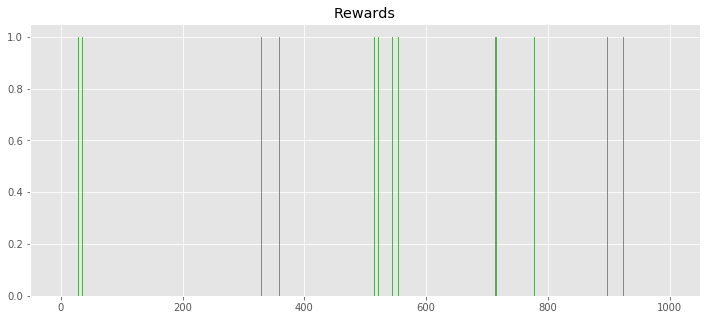

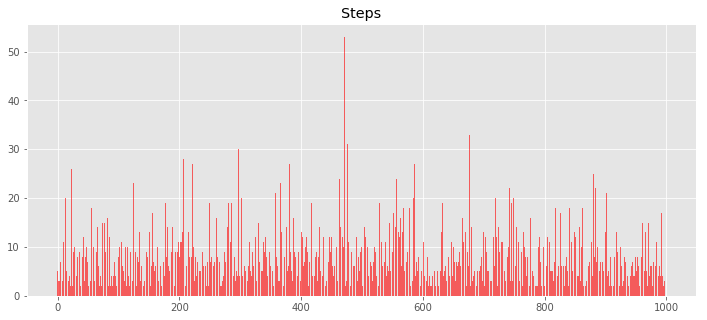

In [4]:
number_of_states = env.observation_space.n # 16
numbers_of_actions = env.action_space.n # 4

gamma = 1

Q = torch.zeros([number_of_states, numbers_of_actions])

num_episodes = 1000
steps_total = []
rewards_total = []

for episode in range(num_episodes):
    state = env.reset()
    step = 0
    while True:
        step += 1
        random_values = Q[state] + torch.rand(1, numbers_of_actions) / 1000 # init space with random values
        action = torch.max(random_values, 1)[1][0].item()
        
        new_state, reward, done, info = env.step(action)
        
        Q[state, action] = reward + gamma * torch.max(Q[new_state])
        state = new_state
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            print("Episode finished after %i steps" % step)
            break


print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))
print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))


plt.style.use('ggplot')

plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green')
plt.show()

plt.figure(figsize=(12,5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red')
plt.show()